In order to solve the task, I modified autoastro a bit, adding a class named `al.mp.StringMatter` and necessary functionalities to that class. You can see the code in [my github fork](https://github.com/woodyZootopia/PyAutoAstro/tree/woody) (or, as this is added as a single commit, you can see the difference at the [commit page](https://github.com/woodyZootopia/PyAutoAstro/commit/ab0e3da02d0c92fd2b6a6845e3584f872543bdb8)).

Though I was able to understand how autoastro works through this task, I wasn't able to understand

* The meaning of convergence in gravitational lensing
* How light is bended by linear string mass
    * I tried reading https://en.wikipedia.org/wiki/Einstein_radius, but it didn't explained the case of string. I think integration of gravitational effect along the string is needed, but I'm not skilled enough in physics to do it...

So the core of `StringMatter`'s implementation (`deflections_from_grid` and `convergence_from_grid`) is left perfunctory. They are implemented as follows:

* `deflections_from_grid`
    * It calculates the distance of grids from the string, and deflects the grid by `deflection_intensity ** 2/ distance_from_string`.
    * If the grid is too near the line (`distance_from_line < core_radius`), `core_radius` is used instead of `distance_from_string`. This is added to avoid divergence of grid deflection.
* `convergence_from_grid`
    * Just returns `np.zeros`...

 Here's the result of the code.

In [1]:
import autofit as af

workspace_path = "/path/to/your/autolens_workspace/"
# for example...
workspace_path = "/home/woody/programing/pyautolens/autolens_workspace/"

af.conf.instance = af.conf.Config(
    config_path=workspace_path + "config/",
    output_path=workspace_path + "output/",
)

In [2]:
%matplotlib inline

import autolens as al
import autolens.plot as aplt

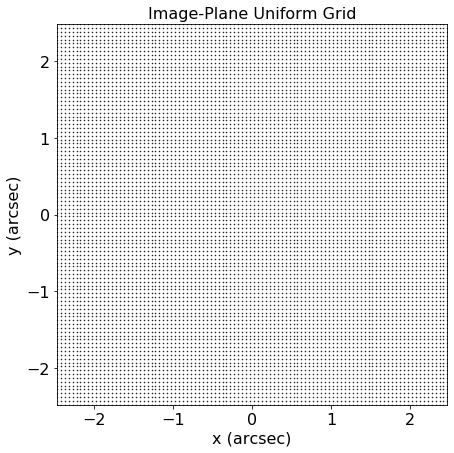

In [3]:
grid = al.grid.uniform(
    shape_2d=(100, 100), pixel_scales=0.05, sub_size=1
)

aplt.grid(
    grid=grid,
    plotter=aplt.Plotter(labels=aplt.Labels(title="Image-Plane Uniform Grid"))
)

In [4]:
sis_mass_profile = al.mp.StringMatter(centre=(0.5,0.0), deflection_intensity=0.2, grad_x=1.2, grad_y=2.3, core_radius=0.1)

mass_profile_deflections = sis_mass_profile.deflections_from_grid(grid=grid)

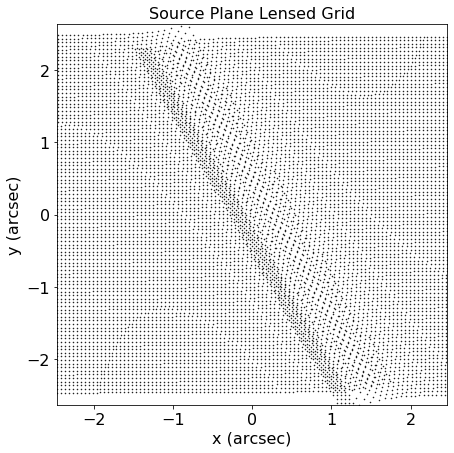

In [5]:
source_plane_grid =  grid - mass_profile_deflections

aplt.grid(
    grid=source_plane_grid,
    plotter=aplt.Plotter(labels=aplt.Labels(title="Source Plane Lensed Grid"))
)

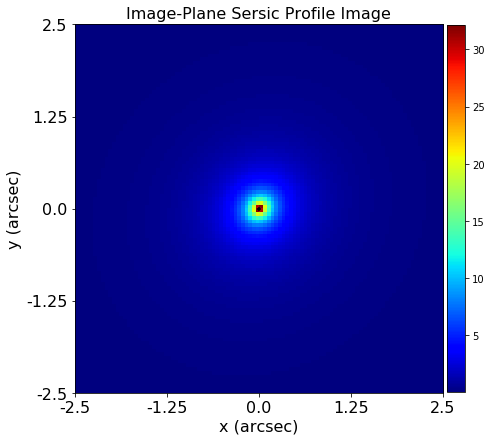

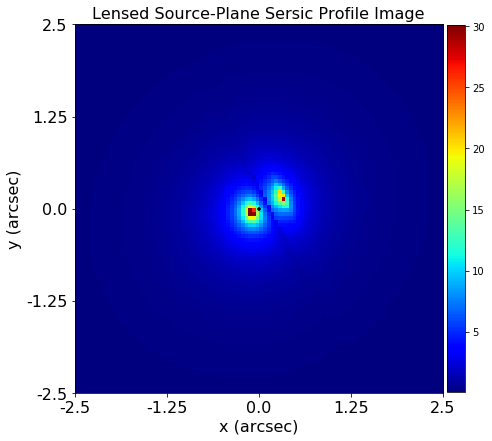

In [6]:
sersic_light_profile = al.lp.EllipticalSersic(
    centre=(0.0, 0.0),
    axis_ratio=0.9,
    phi=45.0,
    intensity=1.0,
    effective_radius=1.0,
    sersic_index=2.5,
)

aplt.lp.profile_image(
    light_profile=sersic_light_profile,
    grid=grid,
    plotter=aplt.Plotter(labels=aplt.Labels(title="Image-Plane Sersic Profile Image")),
)

aplt.lp.profile_image(
    light_profile=sersic_light_profile,
    grid=source_plane_grid,
    plotter=aplt.Plotter(labels=aplt.Labels(title="Lensed Source-Plane Sersic Profile Image")),
)

In [7]:
lens_galaxy = al.Galaxy(
    redshift=0.5,
    mass=al.mp.StringMatter(centre=(0.5,0.0),deflection_intensity=0.2, grad_x=1.2, grad_y=2.3, core_radius=0.1),
)

source_galaxy = al.Galaxy(
    redshift=1.0,
    light=al.lp.SphericalSersic(
        centre=(0.0, 0.0), intensity=1.0, effective_radius=1.0, sersic_index=1.0
    ),
)

tracer = al.Tracer.from_galaxies(galaxies=[lens_galaxy, source_galaxy])

Critical curve could not be calculated due to an unphysical mass model


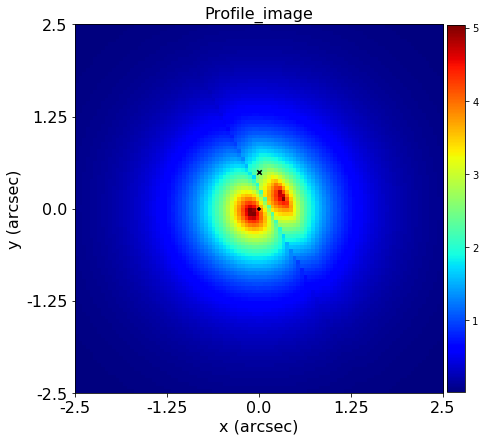

In [8]:
traced_image = tracer.profile_image_from_grid(grid=grid)
aplt.tracer.profile_image(tracer=tracer, grid=grid)